In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl


fast_food = pd.read_csv('./FastFoodNutritionMenuV2.csv')
DRI = pd.read_csv('./Min_Personal Dietary Reference Intake (DRI) - Sheet4.csv')



In [10]:
DRI.head()

,DRI Name,Calories (kcal),Carbohydrates (g),Total Sugar (g),Protein (g),Total Fat (g),Saturated Fat (g),Monounsaturated Fat (g),Polyunsaturated Fat (g),Total Fiber (g),...,Calcium (g),Copper (mg),Iron (mg),Magnesium (mg),Manganese (mg),Phosphorus (g),Potassium (g),Selenium (ug),Sodium (g),Zinc (mg)
0,Minimum,2000,250,0,85,65,0,0,0,28,...,1,0.9,8,420,2.3,0.7,3.5,55,1.5,11
1,Personal,2000,300,0,62,65,0,0,0,25,...,1,0.9,18,310,1.8,0.7,2.6,55,1.5,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            481 non-null    object 
 1   Item               481 non-null    object 
 2   Calories           481 non-null    object 
 3   Total Fat
(g)      481 non-null    float64
 4   Saturated Fat
(g)  481 non-null    object 
 5   Cholesterol
(mg)   481 non-null    object 
 6   Sodium 
(mg)       481 non-null    object 
 7   Carbs
(g)          481 non-null    float64
 8   Fiber
(g)          481 non-null    object 
 9   Sugars
(g)         481 non-null    object 
 10  Protein
(g)        481 non-null    float64
 11  Item Type          481 non-null    object 
dtypes: float64(3), object(9)
memory usage: 45.2+ KB


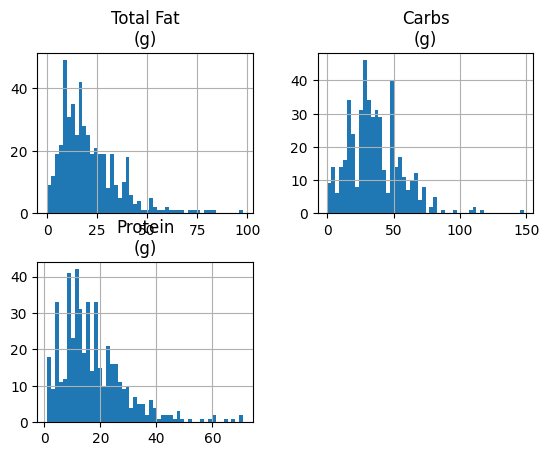

In [74]:
#data profile
#fast food 1 info

fast_food.info()

categorical = fast_food.select_dtypes(include=['object']).columns.tolist()
numerical = fast_food.select_dtypes(include =['object','int64', 'float64']).columns.tolist()

#data clean
fast_food.fillna('LD', inplace=True) # fill missing values with zeros
#fast_food['Fiber'] = fast_food['Fiber'].astype('int') # convert column to integer type
fast_food.isna().sum() # shows all null rows think about what to drop, what will you use, and what can you sacrifice

fast_food.head()

# Histogram for numerical data
fast_food[numerical].hist(bins=50)
plt.show()

# Bar chart for categorical data
#fast_food[categorical].value_counts().plot(kind='bar')
#plt.show()

In [ ]:
# breakfast + LD + LD >= 2000cal
# (B+ BS)+ (LD + S)+ LD
# (B + BS)+ (LD+S)+(LD+S)
# B+(LD+S)+LD
# B+(LD+S)+(LD+S)
# (B+BS)+LD+LD
# then ask a question for the min dri sub colunms